In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

First goal: regression line for 3PM and 3PA over the years using team statistics
These totals will also be including the stats of players who played under 20 minutes, while the player statistics file does not

In [14]:
team = pd.read_csv("all_team_stats_1996-2025.csv")
team["FirstYear"] = team["SEASON"].str[0:4].astype(int) # extract first season from [XXXX-XX] and make a year column for the first year of "XXXX-XX"
totals = team.groupby("FirstYear")[["FG3A", "FG3M"]].sum().reset_index() # total fg3a and fg3m for each year

y0_slope, y0_int, y0_r, y0_p, y0_se = linregress(totals["FirstYear"], totals["FG3A"])
y1_slope, y1_int, y1_r, y1_p, y2_se = linregress(totals["FirstYear"], totals["FG3M"])

In [16]:
# intercept does not really matter for analysis since we will never be looking at year 0, but it matters for the model
print("---3-point attempts vs Year Summary---")
print(f"Slope: {y0_slope: .3f}")
print(f"Intercept: {y0_slope: .3f}")
print(f"R-squared: {y0_r**2: .3f}")
print(f"P-value: {y0_p: .15f}") # very small value

print("---3-point makes Vs Year Summary---")
print(f"Slope: {y1_slope: .3f}")
print(f"Intercept: {y1_slope: .3f}")
print(f"R-squared: {y1_r**2: .3f}")
print(f"P-value: {y1_p: .15f}") # very small value

---3-point attempts vs Year Summary---
Slope:  27.717
Intercept:  27.717
R-squared:  0.890
P-value:  0.000000000000018
---3-point makes Vs Year Summary---
Slope:  10.124
Intercept:  10.124
R-squared:  0.889
P-value:  0.000000000000021


Judging the entire league's stats for a single season:
For each year that passes, the expected value for 3-point attempts increases by 27.717
For each year that passes, the expected value for 3-point makes increases by 10.124 
The r^2 is high and the p-value is low for both the 3PM and 3PA statistics
We would reject the null hypothesis that the year is not a significant predictor for both 3PM and 3PA, even when using a very small alpha like .001
Year is a great estimator for both 3PM and 3PA

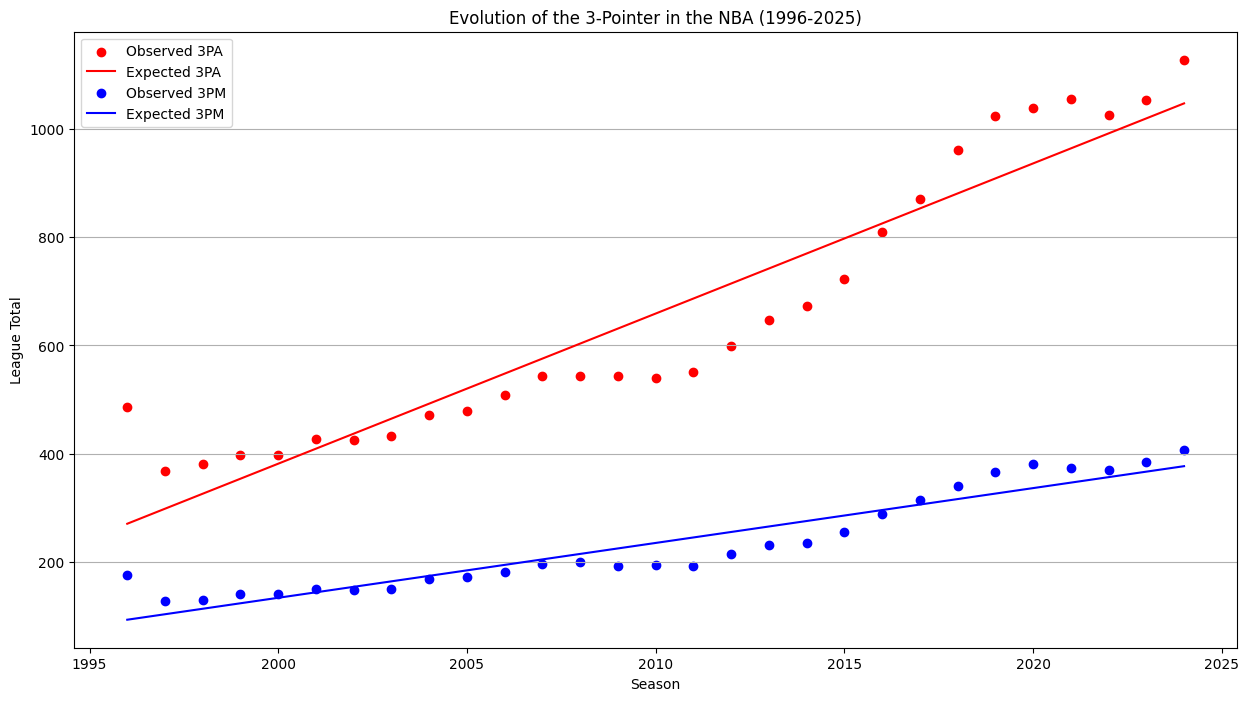

In [28]:
X = totals["FirstYear"]
y0 = totals["FG3A"]
y1 = totals["FG3M"]
plt.figure(figsize=(15, 8))
plt.scatter(X, y0,
            label = "Observed 3PA",
            color = "red")
plt.plot(X, y0_int + y0_slope*X,
         label = "Expected 3PA",
         color = "red")
plt.scatter(X, y1,
            label = "Observed 3PM",
            color = "blue")
plt.plot(X, y1_int + y1_slope*X,
         label = "Expected 3PM",
         color = "blue")

plt.title("Evolution of the 3-Pointer in the NBA (1996-2025)")
plt.xlabel("Season")
plt.ylabel("League Total")
plt.legend()
plt.grid(axis = "y", linestyle = "-")
plt.savefig("nba_3pt_regression_plot.png")